# Linear Regression

Model is weighted combination of feature weights.
$$f(\boldsymbol{x})=w_0+w_1 x_1+\dots+w_d x_d=w_0+\boldsymbol{w}^{\prime} \boldsymbol{x}$$

This model is trained by identify the weights that minimise the mean square error between true and predicted label over all n training examples.
$$squared error/loss $=\frac{1}{2 n} \sum_{i=1}^n\left(y_i-f\left(x_i\right)\right)^2=\frac{1}{2 n} \sum_{i=1}^n\left(y_i-w^{\prime} x_i-w_0\right)^2$$

Since there is no regularization term we call them as the Ordinary least square.
$$\text{OLS learning objective} $=\lambda \cdot \underbrace{0}_{\text {measures model complexity }}+\overbrace{\operatorname{loss}(f, \text { data })}^{\text {measures model fit }}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sympy as sp

mpl.rcParams["figure.figsize"] = (4, 3)



In [2]:
n = 100
X = np.random.uniform(low=-4.0, high=4.0, size=(n,))
f = lambda x: -2.5 * x + 3.2
y = f(X)
y += np.random.normal(scale=1.5, size=(n,))

In [3]:
X_true = np.linspace(-4.25, 4.25, 100)
y_true = f(X_true)

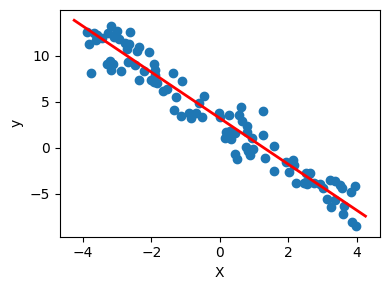

In [4]:
plt.scatter(X, y)
plt.plot(X_true, y_true, c="r", lw=2)
plt.xlabel("X")
plt.ylabel("y")
plt.tight_layout()
plt.show()

# Understanding the different regularization

Different regularization methods serve different modeling needs and can handle different types of data issues. The most common data issue that linear regression models must contend with is that of multicollinearity.

Multicollinearity in data arises when one feature depends on others, that is, when the features are correlated with each other. For example, in medical data, patient weight and blood pressure are often highly correlated. In practical terms, this means that both features convey nearly the same information, and it should be possible to train a less complex model by selecting and using only one of them.

In [5]:
# adding redundant information
X = np.c_[X, 3 * X + 0.25 * np.random.uniform(size=(n,))]

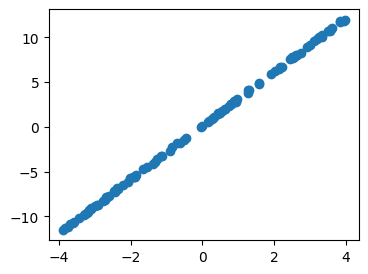

In [6]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [8]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error

models = dict(OLS_Regression=LinearRegression(),
              Ridge_Regression=Ridge(alpha=2.0),
              Lasso_Regression=Lasso(alpha=2.0),
              ElasticNet=ElasticNet(alpha=2.0, l1_ratio=0.5))

for model, regressor in models.items():
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mad = mean_absolute_error(y_test, y_pred)
    print(f"{model}'s performance : MSE = {mse:4.3f} , MAD = {mad:4.3f}")
    print(f"{model} model : {regressor.coef_} * x + {regressor.intercept_:4.3f}")
    print("*"*75)

OLS_Regression's performance : MSE = 2.850 , MAD = 1.318
OLS_Regression model : [15.26553023 -5.90107844] * x + 3.945
***************************************************************************
Ridge_Regression's performance : MSE = 2.493 , MAD = 1.298
Ridge_Regression model : [ 0.02683958 -0.82372098] * x + 3.261
***************************************************************************
Lasso_Regression's performance : MSE = 2.586 , MAD = 1.344
Lasso_Regression model : [-0.         -0.77781145] * x + 3.275
***************************************************************************
ElasticNet's performance : MSE = 2.569 , MAD = 1.336
ElasticNet model : [-0.         -0.78188776] * x + 3.273
***************************************************************************


**Ridge Regression:**

$$\text {ridge regression learning objective} =\lambda \cdot \underbrace{\frac{1}{2}\left(w_1^2+\cdots+w_d^2\right)}_{\text {measures model complexity }}+\overbrace{\text { squared loss}}^{\text {measures model fit }}$$

>What the L2 regularization term will do?
> Learning involves minimizing the learning objective; when the regularization term, or sum of squares is minimized, it pushes individual weights **towards zero but not to zero**. This is known as shrinkage of the model weights, which reduces model complexity.

```
Ridge_Regression's performance : MSE = 1.730 , MAD = 0.963
Ridge_Regression model : [-0.22296262 -0.73844215] * x + 3.481
```
We can see that weight is reduced and performance of the model is increased from OLS.


**LASSO Regression:**

$$\text {LASSO learning objective} =\lambda \cdot \underbrace{\left(\left|w_1\right|+\cdots+\left|w_d\right|\right)}_{\text {measures model complexity }}+\overbrace{\text { squared loss}}^{\text {measures model fit }}$$

L1-regularization is the sum of absolute values of the weights, rather than the sum of squares in L2-regularization. The effect, overall, is similar to L2-regularization, except that L1-regularization shrinks the weights for less predictive features. In contrast, L2-regularization shrinks the weights for all the features uniformly.

Put another way, L1-regularization pushes the weights of less informative features down to zero, which makes it well suited for feature selection. L2-regularization pushes the weights of all features down together, which makes it well suited for handling correlated and covariant features.

```
Lasso_Regression's performance : MSE = 1.601 , MAD = 0.968
Lasso_Regression model : [-0.        -0.7609873] * x + 3.583
```
We can see that L1-regularization induces model sparsity. That is, LASSO performs implicit feature selection during learning to identify a small set of features needed to build a less complex model, while maintaining or even improving performance.

**Elastic Net**
$$\text {elastic net objective }=\lambda \cdot \underbrace{a\left(\left|w_1\right|+\cdots+\left|w_d\right|\right)+\frac{b}{2}\left(w_1^2+\cdots+w_d^2\right)}_{\text {measures model complexity }}+\overbrace{\text { squared loss}}^{\text {measures model fit }}$$

<img src="image/img_6.png">

## Assumption on Linear Regression

1. Error are normally distributed.ie residual $y - f(x)$ is disturbed normally.

In [9]:
n = 500
X = np.random.uniform(low=-3,high=3,size=(n,))
f = lambda x : x+1.5
y = f(X)
y +=  np.random.normal(scale=.15 *np.max(y),size=(n,))

In [10]:
X_true = np.linspace(-3,3,50)
y_true = f(X_true)

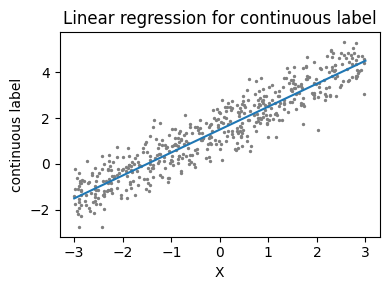

In [11]:
plt.scatter(X,y,s=2,c="grey")
plt.plot(X_true,y_true)
plt.title("Linear regression for continuous label")
plt.xlabel("X")
plt.ylabel("continuous label")
plt.tight_layout()
plt.show()

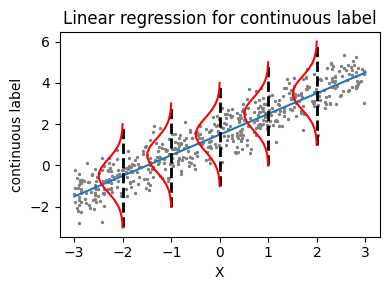

In [12]:
from scipy.stats import norm

plt.scatter(X,y,s=2,c="grey")
plt.plot(X_true,y_true)
# error are distributed normal
scale = np.max(y) * 0.15
for i in np.arange(-2,3,1):
    y_min ,y_max = f(i)-2.5,f(i)+2.5
    yy = np.linspace(y_min,y_max,20)
    xx = np.full((20,),i) -norm.pdf(yy,loc=f(i),scale=scale)
    plt.vlines(x=i,ymin=y_min,ymax=y_max,colors="k",ls="--",lw=2)
    plt.plot(xx,yy,c="r")
plt.title("Linear regression for continuous label")
plt.xlabel("X")
plt.ylabel("continuous label")
plt.tight_layout()
plt.show()

# Poisson Regression for Count labels

In health informatics, for instance, we may wish to build a model to predict the number (essentially, the count) of doctor visits given patient data. In insurance pricing, a common problem is that of modeling claim frequency, to predict the count of how many insurance claims we can expect for different types of insurance policies.

In urban planning, we may want to model different count variables for census regions, such as household size, number of crimes, number of births and deaths, and many more.

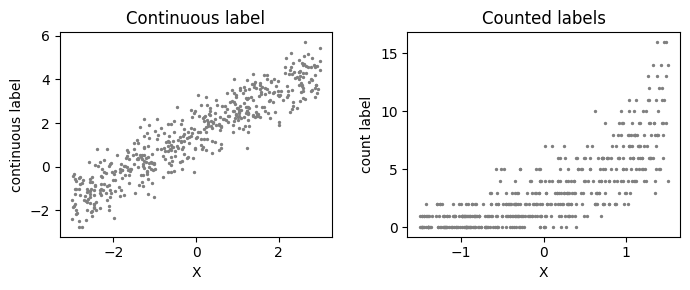

In [13]:
plt.figure(figsize=(7,3))

# continuous data
n = 500
X = np.random.uniform(low=-3,high=3,size=(n,))
f = lambda x : x+1.5
y = f(X)
# error is normal distributed
y +=  np.random.normal(scale=.15 *np.max(y),size=(n,))
ax = plt.subplot(121)
plt.setp(ax,title="Continuous label",
         xlabel="X",ylabel="continuous label")
plt.scatter(X,y,s=2,c="grey")


# count data
X = np.random.uniform(low=-1.5, high=1.5, size=(n, 1))
f = lambda x: x + 0.8
y = np.random.poisson(np.exp(f(X)))
ax = plt.subplot(122)
plt.setp(ax,title="Counted labels",
         xlabel="X",ylabel="count label")
plt.scatter(X,y,s=2,c="grey")


plt.tight_layout()
plt.show()

Regression models for continuous targets assume that the residuals have a certain shape: the normal distribution. As we see below, count-valued targets are not normally distributed, but, in fact, often follow a Poisson distribution.

Because count-valued labels are fundamentally different from continuous-valued labels, a regression approach designed for continuous-valued labels will not generally work well on count-valued labels.